In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('cust_satisfaction.csv')
df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      103904 non-null  object 
 1   Customer Type               103904 non-null  object 
 2   Type of Travel              103904 non-null  object 
 3   Class                       103904 non-null  object 
 4   satisfaction                103904 non-null  object 
 5   Age                         103904 non-null  int64  
 6   Flight Distance             103904 non-null  int64  
 7   Inflight entertainment      103904 non-null  int64  
 8   Baggage handling            103904 non-null  int64  
 9   Cleanliness                 103904 non-null  int64  
 10  Departure Delay in Minutes  103904 non-null  int64  
 11  Arrival Delay in Minutes    103594 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 9.5+ MB


In [4]:
df.isnull().sum()

Gender                          0
Customer Type                   0
Type of Travel                  0
Class                           0
satisfaction                    0
Age                             0
Flight Distance                 0
Inflight entertainment          0
Baggage handling                0
Cleanliness                     0
Departure Delay in Minutes      0
Arrival Delay in Minutes      310
dtype: int64

In [5]:
df.drop_duplicates(inplace=True)


In [6]:
df.dropna(inplace=True)

In [7]:
female = df[df['Gender']=='Female']
female['Customer Type'].value_counts()

Customer Type
Loyal Customer       42272
disloyal Customer    10228
Name: count, dtype: int64

In [8]:
male = df[df['Gender']=='Male']
male['Customer Type'].value_counts()

Customer Type
Loyal Customer       42245
disloyal Customer     8677
Name: count, dtype: int64

In [9]:
df['Type of Travel'].value_counts()

Type of Travel
Business travel    71331
Personal Travel    32091
Name: count, dtype: int64

In [10]:
df['Class'].value_counts()

Class
Business    49423
Eco         46532
Eco Plus     7467
Name: count, dtype: int64

In [11]:
## classification imbalance or balance dataset
df['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    58636
satisfied                  44786
Name: count, dtype: int64

In [12]:
label = list(df['Class'].value_counts().keys())
count = list(df['Class'].value_counts().values)

<Axes: >

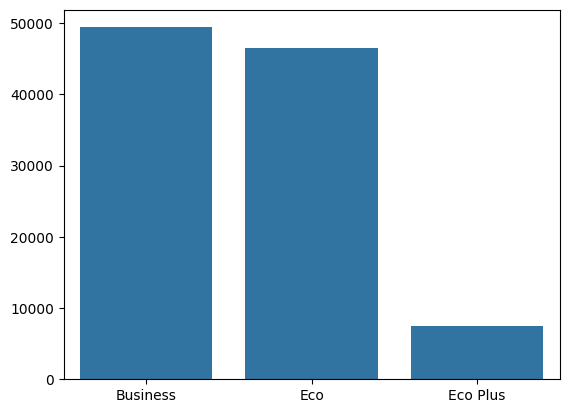

In [13]:
sns.barplot(x=label,y=count)

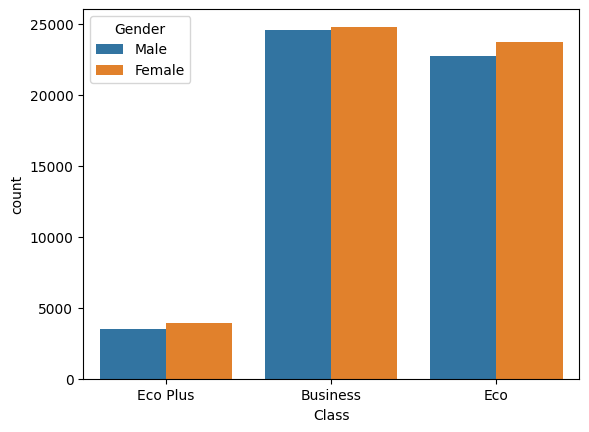

In [14]:
sns.countplot(x='Class',data=df,hue="Gender")
plt.show()

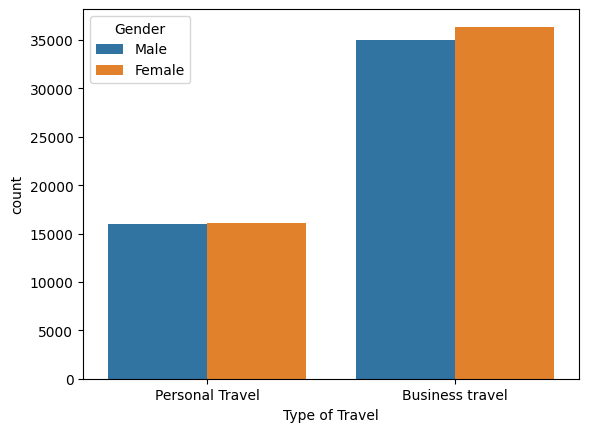

In [15]:
sns.countplot(x='Type of Travel',data=df,hue="Gender")
plt.show()



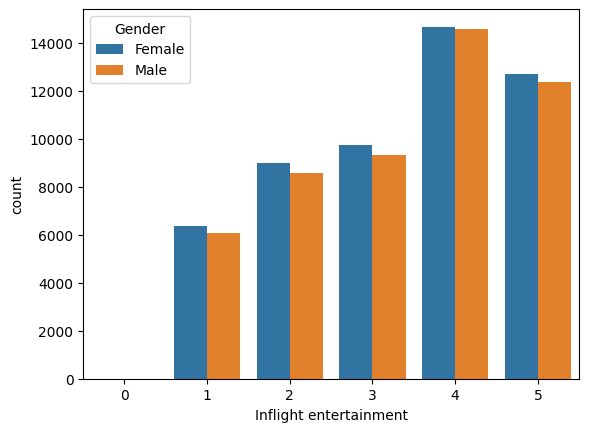

In [16]:
sns.countplot(x='Inflight entertainment',data=df,hue="Gender")
plt.show()

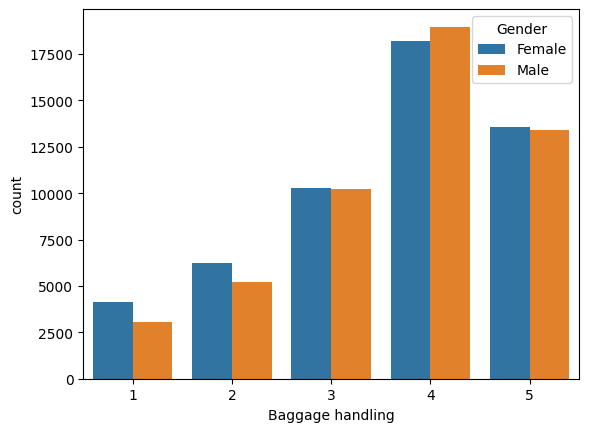

In [17]:
sns.countplot(x='Baggage handling',data=df,hue="Gender")
plt.show()

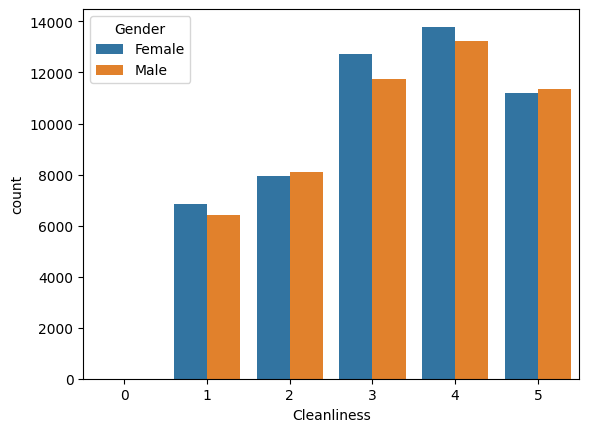

In [18]:
sns.countplot(x='Cleanliness',data=df,hue="Gender")
plt.show()


In [19]:
#from sklearn.preprocessing import Onehotencoder,LabelEncoder
#oneshot encoding representation
df2 = pd.get_dummies(df,drop_first="if_binary").astype(int)

In [20]:
df2.head()

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,13,460,5,4,5,25,18,1,0,1,0,1,0
1,25,235,1,3,1,1,6,1,1,0,0,0,0
2,26,1142,5,4,5,0,0,0,0,0,0,0,1
3,25,562,2,3,2,11,9,0,0,0,0,0,0
4,61,214,3,4,3,0,0,1,0,0,0,0,1


In [21]:
x =df2.drop('satisfaction_satisfied',axis='columns')
y = df2[['satisfaction_satisfied']]

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [24]:
x_train.head()   # form x variables

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
33447,29,1605,4,3,4,8,4,0,1,0,0,0
65731,24,1703,3,4,3,1,0,0,1,0,1,0
72464,69,317,4,4,4,0,0,0,0,0,0,1
59151,20,390,1,5,1,2,0,0,1,0,1,0
76793,51,328,1,1,5,0,3,0,0,1,1,0


In [25]:
## model oralgorithm training
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()

In [26]:
lgr.fit(x_train,y_train)  # training  algorithm


LogisticRegression()

In [27]:
print("Training score ; ",lgr.score(x_train,y_train)*100)
print("Training score ; ",lgr.score(x_test,y_test)*100)


Training score ;  79.22573939108258
Training score ;  79.19265167996133


In [28]:
## Prediction
pred = lgr.predict(x_test)

In [29]:
y_test['prediciton'] = pred

In [30]:
y_test.head(40)

,satisfaction_satisfied,prediciton
45062,0,0
90907,0,0
25436,0,0
67997,0,0
75985,0,0
24392,0,0
86433,0,0
72066,0,0
60887,0,0
27262,0,0


In [31]:
from sklearn.metrics import confusion_matrix,classification_report

In [35]:
confusion_matrix(y_test['satisfaction_satisfied'],y_test['prediciton'])



array([[9269, 2494],
       [1810, 7112]])

In [37]:
print(classification_report(y_test['satisfaction_satisfied'],y_test['prediciton']))

              precision    recall  f1-score   support

           0       0.84      0.79      0.81     11763
           1       0.74      0.80      0.77      8922

    accuracy                           0.79     20685
   macro avg       0.79      0.79      0.79     20685
weighted avg       0.80      0.79      0.79     20685



In [38]:
import joblib

In [39]:
joblib.dump(lgr,'Logistic_regression.lb')

['Logistic_regression.lb']